In [21]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

import api_function
import stock_function

In [22]:
df_apple = pd.read_csv('data/AAPL-Daily.csv')
df_apple.head()

,timestamp,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575917,0.446990,0.065356,0.036119
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643499,0.839024,0.122857,0.036119
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783871,0.742256,0.110000,0.036119
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512,0.626532,0.093928,0.036119
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021,-0.886021,-0.134644,0.036119


In [23]:
def add_log_returns_column(df, start_date, end_date):
    df.columns = [col.replace(" ", "_").lower() for col in df.columns]

    df.index = pd.to_datetime(df.index)
    mask = (df.index >= start_date) & (df.index <= end_date)
    df = df.loc[mask].reset_index()
    df["log_returns"] = np.log(df.close / df.close.shift())
    return df

In [24]:
df_apple = add_log_returns_column(df_apple, '2021-01-01', '2021-12-31')
df_apple

,index,timestamp,high,low,open,close,volume,adj_close,ratio,absolute,avg_ratio,log_returns


In [25]:
if 'log_returns' in df_apple.columns:
    print('yes')
else:
    print('no')

yes


In [26]:
def calc_volatility(df, start_date, end_date, trading_day): 
    if 'log_returns' in df.columns:
        return df['log_returns'].std()*trading_day**0.5
    else: 
        df = add_log_returns_column(df, start_date, end_date)
        return df['log_returns'].std()*trading_day**0.5

In [27]:
calc_volatility(df_apple, '2021-01-01', '2021-12-31', 252)

nan

Text(0.5, 1.0, 'AAPL volatility: nan%')

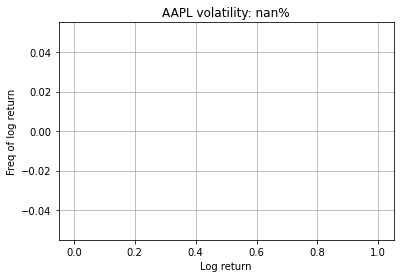

In [28]:
volatility = calc_volatility(df_apple, '2021-01-01', '2021-12-31', 252)
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
df_apple['log_returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('AAPL volatility: ' + str_vol + '%')

In [29]:
volatility = calc_volatility(df_apple, "2021-01-01", "2021-12-31", 252)
str_vol = str(round(volatility, 4) * 100)

fig = px.histogram(df_apple, x="log_returns", title="AAPL volatility: " + str_vol + "%")

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df_microsoft = pd.read_csv('data/MSFT-Daily.csv')
df_microsoft.head()

In [ ]:
df_microsoft = add_log_returns_column(df_microsoft, "2021-01-01", "2021-12-31")
df_microsoft


In [ ]:
volatility = calc_volatility(df_microsoft, "2021-01-01", "2021-12-31", 252)
str_vol = str(round(volatility, 4) * 100)

fig = px.histogram(
    df_microsoft, x="log_returns", title="Volatility: " + str_vol + "%"
)

fig.show()


In [ ]:
apple_yahoo = pdr.get_data_yahoo('AAPL', dt.date(2012, 1, 1), dt.date(2021, 12, 31))

In [ ]:
apple_yahoo.head()

In [ ]:
aapl_yahoo_web = web.DataReader('AAPL', 'yahoo', start='2012-01-01', end='2021-12-31')
aapl_yahoo_web.head()

In [ ]:
apple_yahoo_vo = stock_function.calc_volatility(apple_yahoo, "2021-01-01", "2021-12-31", 252)
apple_yahoo_vo

In [ ]:
bitcoin_yahoo = pdr.get_data_yahoo('BTC-USD', dt.date(2012, 1, 1), dt.date(2021, 12, 31))
print(bitcoin_yahoo.head())

In [ ]:
bitcoin_yahoo_vo = stock_function.calc_volatility(bitcoin_yahoo, "2021-01-01", "2021-12-31", 252)
bitcoin_yahoo_vo

In [ ]:
df_bitcoin = pd.read_csv('data/BTC-Daily.csv')
df_bitcoin.head()

In [ ]:
df_bitcoin_v = calc_volatility(df_bitcoin, "2021-01-01", "2021-12-31", 252)
df_bitcoin_v

In [ ]:
start_date="2012-01-01"
end_date="2021-12-31"
df_aapl = api_function.get_df_stock_daily("AAPL", start_date, end_date)

In [ ]:
df_aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575917
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643501
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783873
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917513
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897021
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [ ]:
(
    df_aapl,
    df_btc,
    df_fb,
    df_goog,
    df_msft,
    df_tsla,
) = api_function.get_all_focused_stocks(start_date="2012-01-01", end_date="2021-12-31")


In [ ]:
df_btc.head()

In [ ]:
print(f'Dataframe contains stock prices between {df_btc.index.min()} {df_btc.index.max()}') 
print(f'Total days = {(df_btc.index.max() - df_btc.index.min()).days} days')

In [ ]:
df_btc.pct_change(1)

In [ ]:
mean_daily_ret = df_btc.pct_change(1).mean()
mean_daily_ret

In [ ]:
df_aapl

,high,low,open,close,volume,adj_close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575918
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643502
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783867
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917510
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [ ]:
stock_function.revenue(df_aapl, '2020-01-02', '2020-12-31', 100)

2.3860901883103436